# Midterm Skills Exam: Data Wrangling and Analysis

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [37]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [38]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [39]:
# merging the dataframe
import pandas as pd

census_df = pd.concat([X, y], axis=1)
census_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
# columns of the dataset
census_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [41]:
# overview of the data
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB



Some messiness in our data:

*   Object datatypes that need to be converted as integer in order to be analyzed further
*   There are missing and duplicated values
*   In the income column, some values have period as their last character
*   The education and education-num column is redundant




Checking if there are null and duplicated values.

In [42]:
census_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [43]:
census_df.duplicated().value_counts()

False    48813
True        29
Name: count, dtype: int64

# Cleaning the Dataset

In [44]:
census_df_raw = census_df.copy()

#### 1. Changing the datatype of column sex (male = 0, female = 1)

In [45]:
census_df['sex'] = census_df['sex'].map({'Male': 0, 'Female': 1})
census_df['sex'] = census_df['sex'].astype(int)

In [46]:
census_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,<=50K


#### 2. Arranging the 'income' column

Some values in the 'income' column have a period as a last character which I intend to remove

In [47]:
census_df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [48]:
census_df['income'] = census_df['income'].str.rstrip('.')
census_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

#### 3. Handling 'education' and 'education-num' columns


'education-num' is just the numerical representation of 'education' which can be dropped because it won't be needed later on the analysis and makes our dataset much more simple and consistent

* 1 = Preschool
* 2 = 1st-4th
* 3 = 5th-6th
* 4 = 7th-8th
* 5 = 9th
* 6 = 10th
* 7 = 11th
* 8 = 12th
* 9 = HS-grad
* 10 = Some-college
* 11 = Assoc-voc
* 12 = Assoc-acdm
* 13 = Bachelors
* 14 = Masters
* 15 = Prof-school
* 16 = Doctorate


In [49]:
census_df[['education', 'education-num']].value_counts()

education     education-num
HS-grad       9                15784
Some-college  10               10878
Bachelors     13                8025
Masters       14                2657
Assoc-voc     11                2061
11th          7                 1812
Assoc-acdm    12                1601
10th          6                 1389
7th-8th       4                  955
Prof-school   15                 834
9th           5                  756
12th          8                  657
Doctorate     16                 594
5th-6th       3                  509
1st-4th       2                  247
Preschool     1                   83
Name: count, dtype: int64

In [50]:
census_df.drop('education', axis=1, inplace=True)
census_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,<=50K


In [51]:
# changing education-num to education
census_df.rename(columns={'education-num':'education'}, inplace=True)
census_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,<=50K


#### 4. Handling missing values

In [52]:
census_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Filling null values with 'Unknown'

In [53]:
census_df.fillna('Unknown', inplace=True)

In [54]:
census_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [55]:
(census_df == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Replacing the '?' values with 'Unknown'

In [56]:
cols_replace = ['workclass', 'occupation', 'native-country']
census_df[cols_replace] = census_df[cols_replace].replace('?', 'Unknown')

In [57]:
(census_df == '?').sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### 5. Handling duplicated data

In [58]:
census_df.duplicated().value_counts()

False    48790
True        52
Name: count, dtype: int64

There are 29 duplicated values which will be dropped.

In [59]:
# size of dataset before dropping duplicates
census_df.shape

(48842, 14)

In [60]:
# size of dataset after dropping duplicates
census_df = census_df.drop_duplicates()
census_df.shape

(48790, 14)

In [61]:
census_df.duplicated().value_counts()

False    48790
Name: count, dtype: int64

#### 6. Dropping columns

I think that the native-country, marital-status, relationship, capital-gain, capital-loss, and fnlwgt columns are irrelevant in analyzing the dataset. Therefore, I will drop it.

In [63]:
census_df = census_df.drop(columns={'native-country', 'marital-status', 'relationship', 'capital-gain', 'capital-loss', 'fnlwgt'})
census_df.head()

,age,workclass,education,occupation,race,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,White,0,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,White,0,13,<=50K
2,38,Private,9,Handlers-cleaners,White,0,40,<=50K
3,53,Private,7,Handlers-cleaners,Black,0,40,<=50K
4,28,Private,13,Prof-specialty,Black,1,40,<=50K


# Result after the Cleaning

In [64]:
print('Raw dataset: \n')
print(census_df_raw.dtypes)
census_df_raw.head()

Raw dataset: 

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
print('Cleaned dataset: \n')
print(census_df.dtypes)
census_df.head()

Cleaned dataset: 

age                int64
workclass         object
education          int64
occupation        object
race              object
sex                int64
hours-per-week     int64
income            object
dtype: object


,age,workclass,education,occupation,race,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,White,0,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,White,0,13,<=50K
2,38,Private,9,Handlers-cleaners,White,0,40,<=50K
3,53,Private,7,Handlers-cleaners,Black,0,40,<=50K
4,28,Private,13,Prof-specialty,Black,1,40,<=50K


# Exploratory Data Analysis


Questions to Answer:

*   How many distribution of income levels?
*   Which features influence income levels?
*   How does education impact income?
*   Employment patterns and income
*   Demographic insights





In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

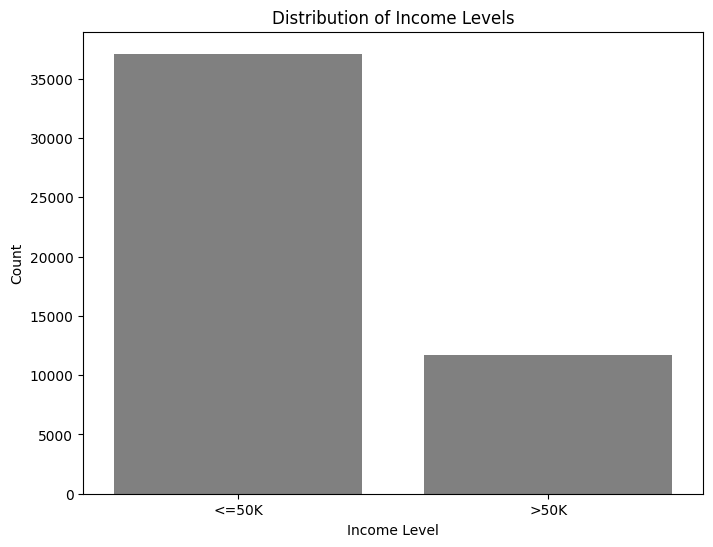

In [ ]:
# visualize the distribution of income levels
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=census_df, color='grey')
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()



*   Majority of the people included earns less than 50K.



Age vs. Income Level

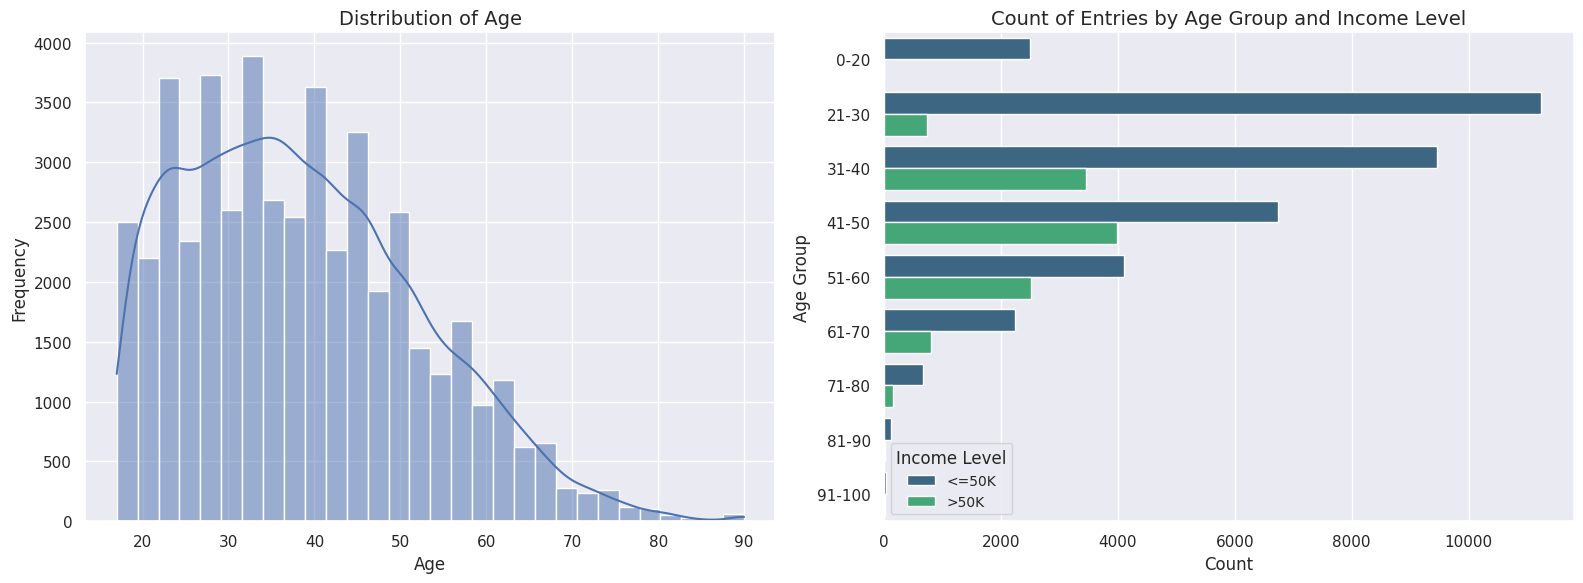

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# distribution of age
sns.histplot(census_df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age', fontsize=14)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# relation of age and income label
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# creating a new column for the created age bins
census_df['age_group'] = pd.cut(census_df['age'], bins=age_bins, labels=age_labels, right=False)

sns.countplot(y='age_group', hue='income', data=census_df, palette='viridis', ax=axes[1])
axes[1].set_title('Age Group vs. Income Level', fontsize=14)
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_ylabel('Age Group', fontsize=12)
axes[1].legend(title='Income Level', fontsize=10)

plt.tight_layout()
plt.show()



*   Majority of the entries are between the ages of 25 and 50 years old. The ages are distributed with a 10 year interval and the majority of the ones earning less than 50K are in the 21-30 age group while 41-50 years old are earning more than 50K.



Education vs. Income Level

<ipython-input-85-c7b34bd48ea8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=census_df, ax=axes[0], palette='coolwarm')


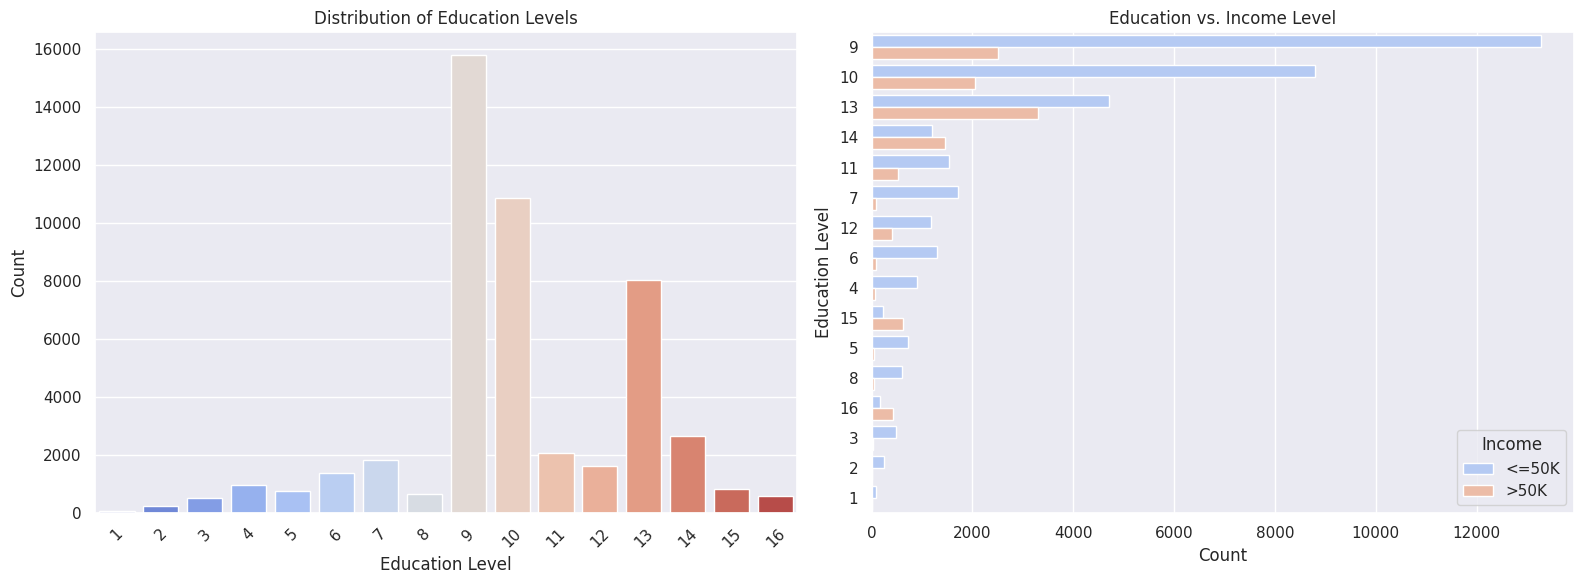

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# distribution of education levels
sns.countplot(x='education', data=census_df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Distribution of Education Levels')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# education vs. income level
education_order = census_df['education'].value_counts().index  # order by frequency
sns.countplot(y='education', hue='income', data=census_df, order=education_order, ax=axes[1], palette='coolwarm')
axes[1].set_title('Education vs. Income Level')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Education Level')
axes[1].legend(title='Income', loc='lower right')

plt.tight_layout()
plt.show()



*   Majority of the individuals had a high school education and only a small portion belongs to the doctorate and 1st-4th grade group. The ones that had high school education is leading when earning less than 50K. While the bachelors group contains more individual that earns more than 50K.


Work-Class vs. Income Level

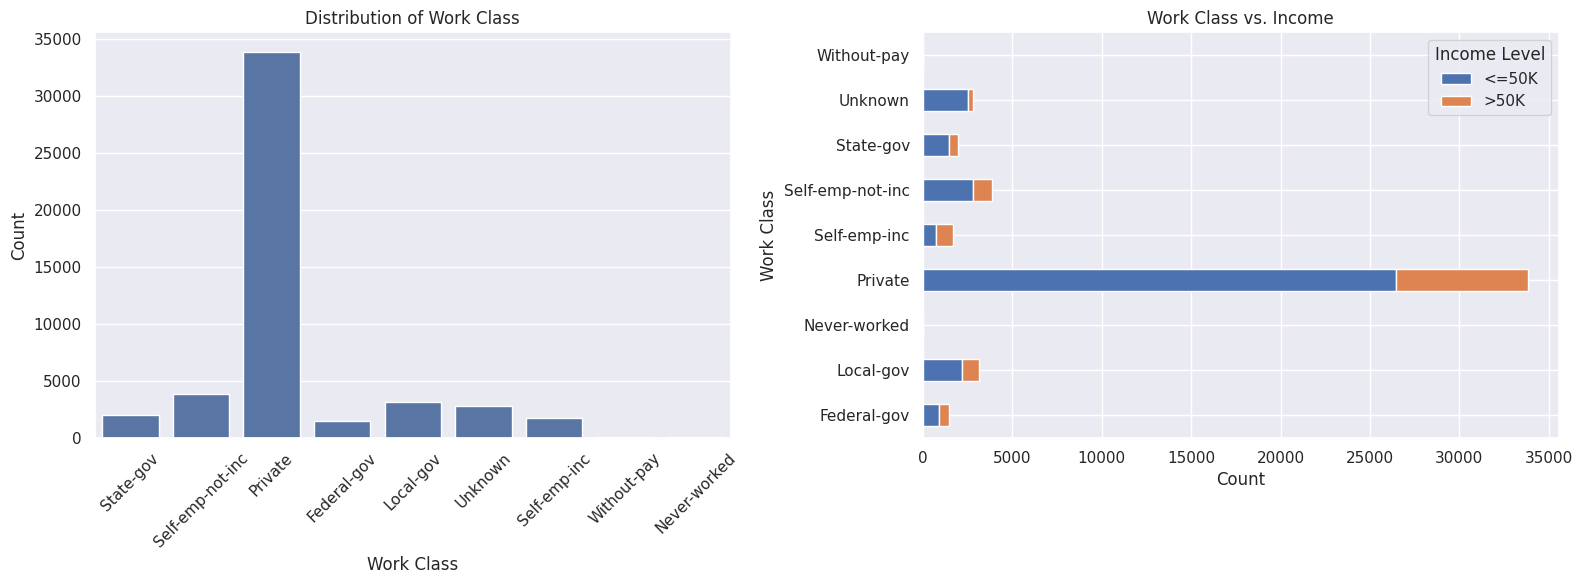

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# distribution of work-class
sns.countplot(x='workclass', data=census_df, ax=axes[0])
axes[0].set_title('Distribution of Work Class')
axes[0].set_xlabel('Work Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Work Class vs. Income
# count of each workclass by income level
workclass_income_counts = census_df.groupby(['workclass', 'income']).size().unstack(fill_value=0)

workclass_income_counts.plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('Work Class vs. Income')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Work Class')
axes[1].legend(title='Income Level')

plt.tight_layout()
plt.show()



*   Most individuals belong to the private sector which is also the majority in earning both less than and greater than 50K.



Occupation vs. Income Level

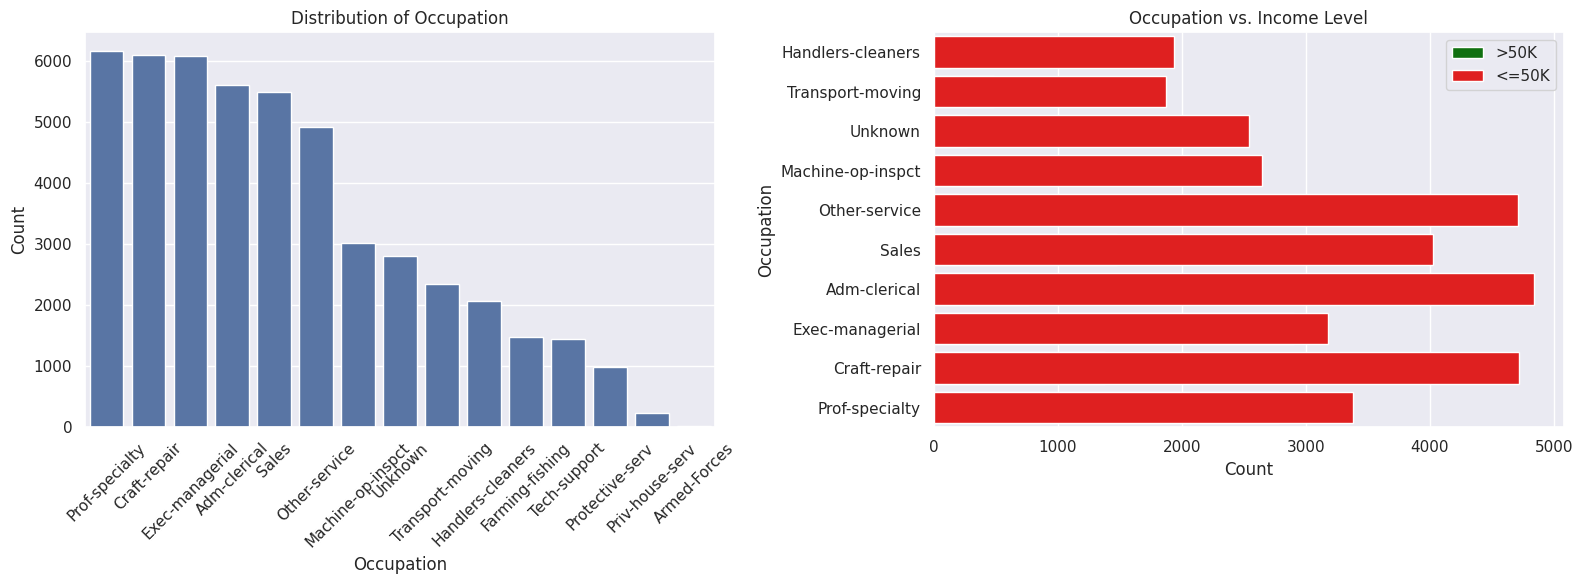

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# distribution of occupation
sns.countplot(x='occupation', data=census_df, ax=axes[0], order=census_df['occupation'].value_counts().index)
axes[0].set_title('Distribution of Occupation')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Occupation vs. Income Level
occupation_income_counts = census_df.groupby('occupation')['income'].value_counts().unstack().fillna(0)
occupation_income_counts['Total'] = occupation_income_counts['>50K'] + occupation_income_counts['<=50K']
occupation_income_counts = occupation_income_counts.sort_values(by='Total', ascending=False).drop('Total', axis=1)

sns.barplot(y=occupation_income_counts.index[:10], x='>50K', data=occupation_income_counts.head(10), color='green', label='>50K', ax=axes[1])
sns.barplot(y=occupation_income_counts.index[:10], x='<=50K', data=occupation_income_counts.head(10), color='red', label='<=50K', ax=axes[1])

axes[1].set_title('Occupation vs. Income Level')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Occupation')
axes[1].legend()
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()



*   Most individuals belong to the professional group although adm-clerical is the more likely to have an income of greater than 50K.



Hours per Week vs. Income Level

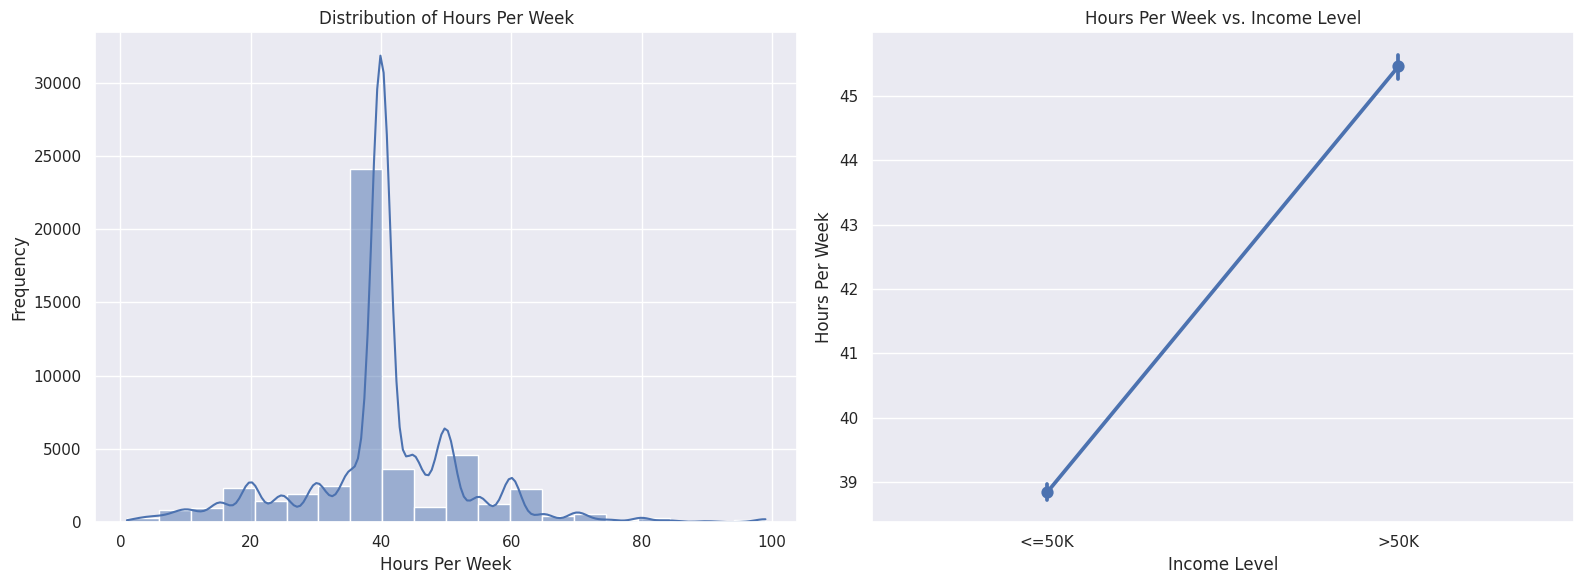

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# distribution of hours-per-week
sns.histplot(census_df['hours-per-week'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Hours Per Week')
axes[0].set_xlabel('Hours Per Week')
axes[0].set_ylabel('Frequency')

# hours-per-week vs. income level
sns.pointplot(x='income', y='hours-per-week', data=census_df, ax=axes[1])
axes[1].set_title('Hours Per Week vs. Income Level')
axes[1].set_xlabel('Income Level')
axes[1].set_ylabel('Hours Per Week')

plt.tight_layout()
plt.show()



*   The majority of individuals are working 40 hours a week which is normal in terms of working hours.
*   Working less than 40 hours a week is most likely earning less than 50K.





Race vs. Income Level

<ipython-input-90-32101834cb5c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race', data=census_df, ax=axes[0], palette='Set2')  # Use Set2 palette for colors


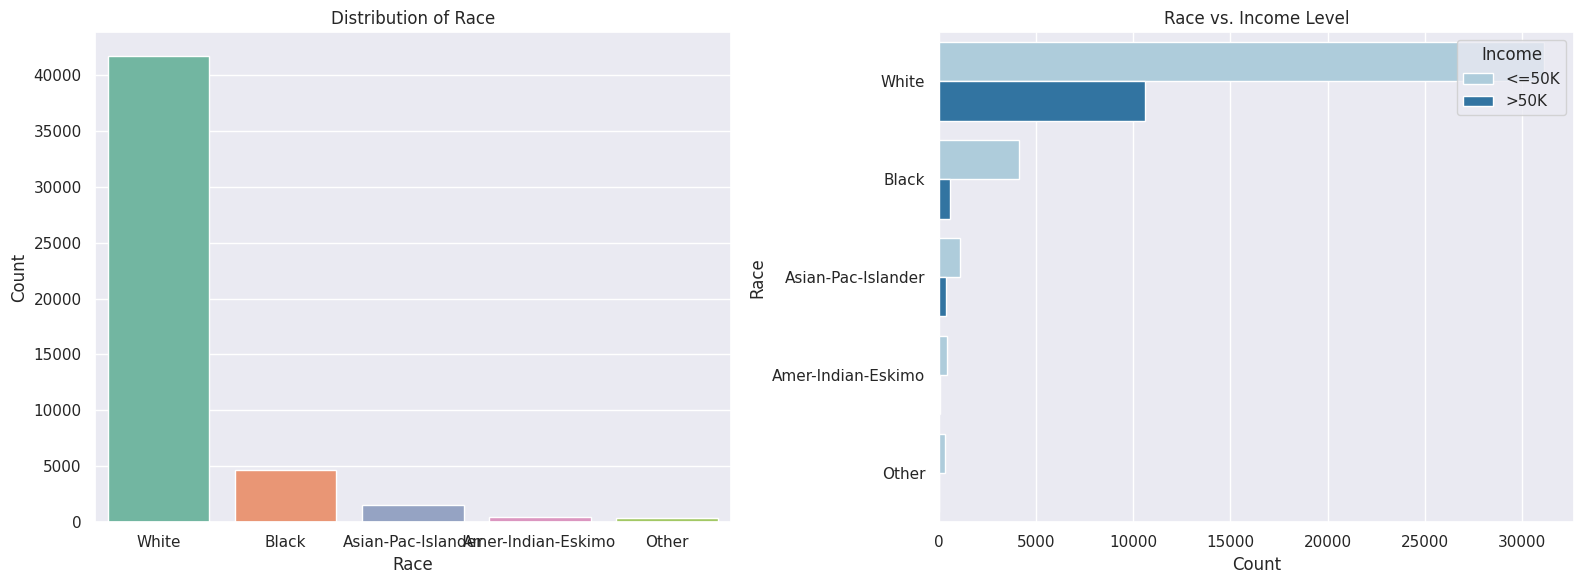

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# distribution of race
sns.countplot(x='race', data=census_df, ax=axes[0], palette='Set2')  # Use Set2 palette for colors
axes[0].set_title('Distribution of Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Count')

# Race vs. Income Level
sns.countplot(y='race', hue='income', data=census_df, ax=axes[1], palette='Paired')  # Use Paired palette for colors
axes[1].set_title('Race vs. Income Level')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Race')
axes[1].legend(title='Income', loc='upper right')

plt.tight_layout()
plt.show()



*   Most individuals are white.
*   The majority of earning both less than and greater than 50K is also present in the ones that is white while black is the second most represented group.



Sex vs. Income Level

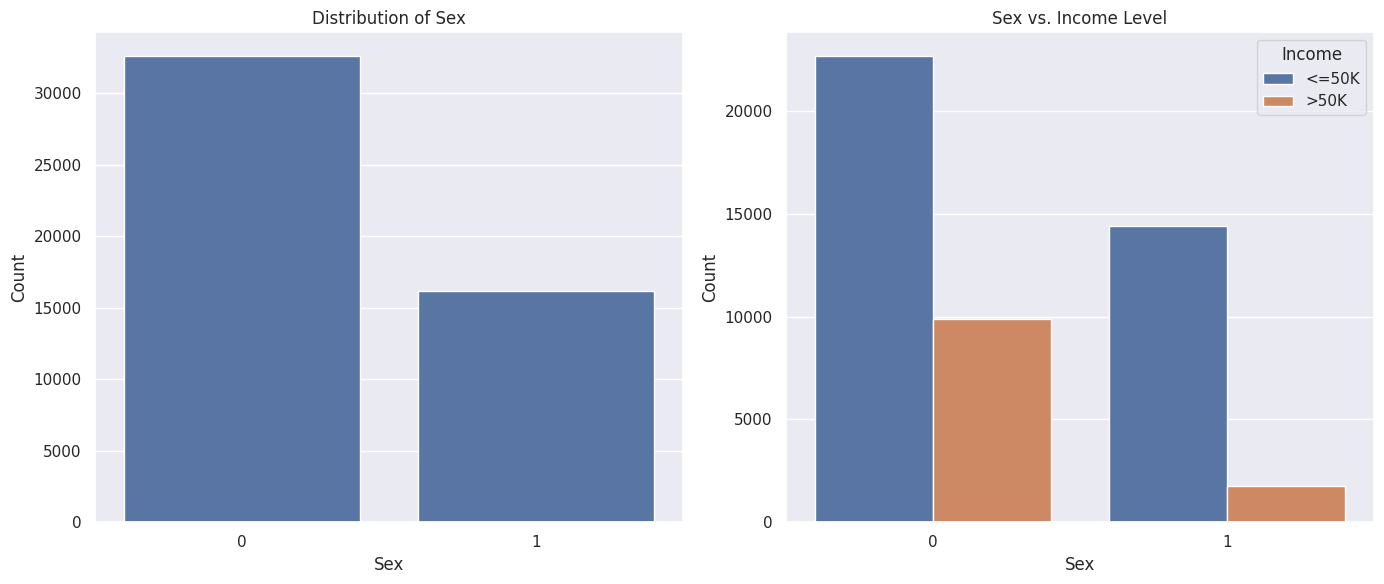

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# distribution of sex
sns.countplot(x='sex', data=census_df, ax=axes[0])
axes[0].set_title('Distribution of Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Sex vs. Income Level
sns.countplot(x='sex', hue='income', data=census_df, ax=axes[1])
axes[1].set_title('Sex vs. Income Level')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
axes[1].legend(title='Income', labels=['<=50K', '>50K'])

plt.tight_layout()
plt.show()



*   Majority of the indivuals included are male and they do make more than the female in terms of income.

